### Plot ENSO composites for precipitation and rainfall to compare with extreme plots

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/563/rl5183/PhD-research/Functions')
import functions as func
from importlib import reload
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
#SST dataset for nino index
ersst = xr.open_dataset('/g/data/eg3/jxb548/OBSDATA/ersstv5.1854_2019.nc')
#Temperature dataset GISTEMP monthly anomalies relative to the 1951-1980 base period on a 2x2 degree grid
gistemp = xr.open_dataset('/g/data/w40/rl5183/air.2x2.250.mon.anom.land.nc')
#Precipitation dataset GPCC precipitation in mm/month 
gpcc = xr.open_mfdataset('/g/data/ua8/Precipitation/GPCC/v2020/mon/10/*.nc')

In [3]:
#NINO34 INDEX
#select out sst data for common period of 1901-2015
ersst_sst = ersst.sst.sel(time=slice('1901-01', '2018-12'))
#detrend
ersst_detrend = np.apply_along_axis(func.detrend_2step, 0, ersst_sst)
ersst_sst_dt = xr.DataArray(ersst_detrend, coords=ersst_sst.coords, attrs=ersst_sst.attrs)
#calculate nino34 index 
nino34_index =  func.nino34_index(ersst_sst_dt, '1950-01', '1979-12') #what climatology to use?
#use index to find el nino and la nina event years 
el_nino_years, la_nina_years = func.find_event_years(nino34_index, 0.4, 6)
#offset years for djf and mam
el_nino_years_offset = el_nino_years +1
la_nina_years_offset = la_nina_years +1

In [4]:
#Find seasonal mean temperature anomalies (data already anoms)
temp_data = gistemp.air.sel(time=slice('1901-01', '2018-12'))
#detrend
temp_detrend = np.apply_along_axis(func.detrend_2step, 0, temp_data)
temp = xr.DataArray(temp_detrend, coords=temp_data.coords, attrs=temp_data.attrs)
#add seasonyear dimension 
func.seasonyear(temp)
#find yearly seasonal means
seasonal_temp = temp.groupby('seasonyear').apply(func.seasonal_mean).drop_sel(seasonyear=[1901, 2019])  

In [5]:
#select out each season
seasonal_temp_jja = seasonal_temp.sel(season='JJA')
seasonal_temp_son = seasonal_temp.sel(season='SON')
seasonal_temp_djf = seasonal_temp.sel(season='DJF')
seasonal_temp_mam = seasonal_temp.sel(season='MAM')

In [6]:
#already anomalies so can select out el nino years (offset for DJF and MAM)
seasonal_temp_jja_el_nino = seasonal_temp_jja.sel(seasonyear=el_nino_years)
seasonal_temp_son_el_nino = seasonal_temp_son.sel(seasonyear=el_nino_years)
seasonal_temp_djf_el_nino = seasonal_temp_djf.sel(seasonyear=el_nino_years_offset)
seasonal_temp_mam_el_nino = seasonal_temp_mam.sel(seasonyear=el_nino_years_offset)
#select out la nina years
seasonal_temp_jja_la_nina = seasonal_temp_jja.sel(seasonyear=la_nina_years)
seasonal_temp_son_la_nina = seasonal_temp_son.sel(seasonyear=la_nina_years)
seasonal_temp_djf_la_nina = seasonal_temp_djf.sel(seasonyear=la_nina_years_offset)
seasonal_temp_mam_la_nina = seasonal_temp_mam.sel(seasonyear=la_nina_years_offset)

In [7]:
#find seasonal mean precipitation anomalies
precip = gpcc.precip.sel(time=slice('1901-01', '2018-12'))
#add seasonyear dimension
func.seasonyear(precip)
#find yearly seasonal means
seasonal_precip = precip.groupby('seasonyear').apply(func.seasonal_mean).drop_sel(seasonyear=[1901, 2019])
#select out each season
seasonal_precip_jja = seasonal_precip.sel(season='JJA')
seasonal_precip_son = seasonal_precip.sel(season='SON')
seasonal_precip_djf = seasonal_precip.sel(season='DJF')
seasonal_precip_mam = seasonal_precip.sel(season='MAM')
#calculate seasonal climatology 
seasonal_precip_jja_clim = seasonal_precip_jja.sel(seasonyear=slice(1950,1979)).mean(dim='seasonyear')
seasonal_precip_son_clim = seasonal_precip_son.sel(seasonyear=slice(1950,1979)).mean(dim='seasonyear')
seasonal_precip_djf_clim = seasonal_precip_djf.sel(seasonyear=slice(1950,1979)).mean(dim='seasonyear')
seasonal_precip_mam_clim = seasonal_precip_mam.sel(seasonyear=slice(1950,1979)).mean(dim='seasonyear')
#calculate anomalies
seasonal_precip_jja_anom = seasonal_precip_jja - seasonal_precip_jja_clim
seasonal_precip_son_anom = seasonal_precip_son - seasonal_precip_son_clim
seasonal_precip_djf_anom = seasonal_precip_djf - seasonal_precip_djf_clim
seasonal_precip_mam_anom = seasonal_precip_mam - seasonal_precip_mam_clim
#select out el nino years
seasonal_precip_jja_el_nino = seasonal_precip_jja_anom.sel(seasonyear=el_nino_years)
seasonal_precip_son_el_nino = seasonal_precip_son_anom.sel(seasonyear=el_nino_years)
seasonal_precip_djf_el_nino = seasonal_precip_djf_anom.sel(seasonyear=el_nino_years_offset)
seasonal_precip_mam_el_nino = seasonal_precip_mam_anom.sel(seasonyear=el_nino_years_offset)
#select out la nina years 
seasonal_precip_jja_la_nina = seasonal_precip_jja_anom.sel(seasonyear=la_nina_years)
seasonal_precip_son_la_nina = seasonal_precip_son_anom.sel(seasonyear=la_nina_years)
seasonal_precip_djf_la_nina = seasonal_precip_djf_anom.sel(seasonyear=la_nina_years_offset)
seasonal_precip_mam_la_nina = seasonal_precip_mam_anom.sel(seasonyear=la_nina_years_offset)

### Plots

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.01/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.01/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:319: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.01/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.01/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:30

Text(0.43, 0.98, 'Seasonal temperature anomalies El Nino')

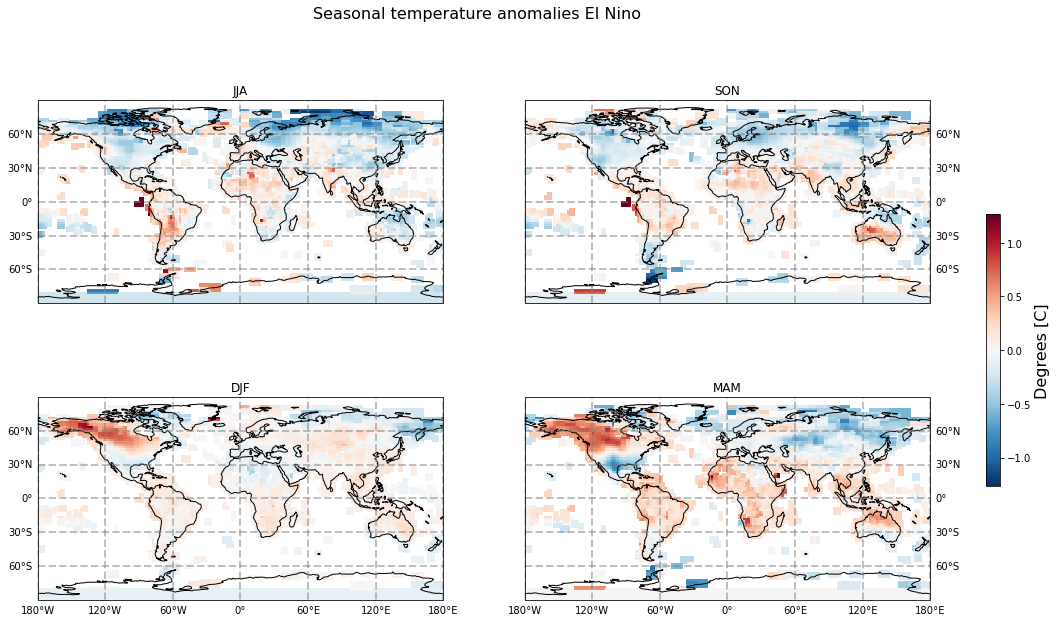

In [8]:
#plot seasonal el nino temperature composites
fig = plt.figure(figsize=(20,10))
axs = []

#vmin = 
#vmax = 

ax = fig.add_subplot(221, projection=ccrs.PlateCarree())
C = seasonal_temp_jja_el_nino.mean(dim='time').plot(ax=ax, add_colorbar=False, transform=ccrs.PlateCarree(), cmap='RdBu_r')
ax.coastlines()
ax.set_global()
ax.set_title('JJA')
axs.append(ax)
#gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax = fig.add_subplot(222, projection=ccrs.PlateCarree())
C = seasonal_temp_son_el_nino.mean(dim='time').plot(ax=ax, add_colorbar=False, transform=ccrs.PlateCarree(), cmap='RdBu_r')
ax.coastlines()
ax.set_global()
ax.set_title('SON')
axs.append(ax)
#gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom = False
gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax = fig.add_subplot(223, projection=ccrs.PlateCarree())
C = seasonal_temp_djf_el_nino.mean(dim='time').plot(ax=ax, add_colorbar=False, transform=ccrs.PlateCarree(), cmap='RdBu_r')
ax.coastlines()
ax.set_global()
ax.set_title('DJF')
axs.append(ax)
#gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax = fig.add_subplot(224, projection=ccrs.PlateCarree())
C = seasonal_temp_mam_el_nino.mean(dim='time').plot(ax=ax, add_colorbar=False, transform=ccrs.PlateCarree(), cmap='RdBu_r')
ax.coastlines()
ax.set_global()
ax.set_title('MAM')
axs.append(ax)
#gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

cbar = plt.colorbar(C, ax=axs, shrink=0.5, pad=0.05)
cbar.ax.set_ylabel('Degrees [C]', fontsize=16)

plt.suptitle('Seasonal temperature anomalies El Nino', x=0.43, fontsize=16)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.01/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.01/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:319: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.01/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.01/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:30

Text(0.43, 0.98, 'Seasonal temperature anomalies La Nina')

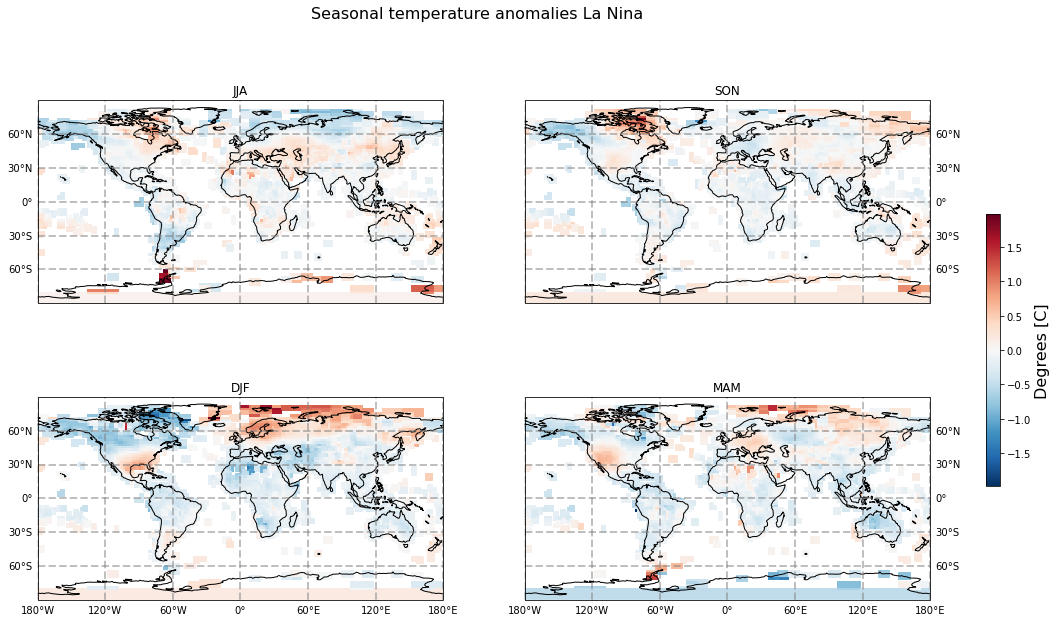

In [9]:
#plot seasonal la nina temperature composites
fig = plt.figure(figsize=(20,10))
axs = []

#vmin = 
#vmax = 

ax = fig.add_subplot(221, projection=ccrs.PlateCarree())
C = seasonal_temp_jja_la_nina.mean(dim='time').plot(ax=ax, add_colorbar=False, transform=ccrs.PlateCarree(), cmap='RdBu_r')
ax.coastlines()
ax.set_global()
ax.set_title('JJA')
axs.append(ax)
#gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax = fig.add_subplot(222, projection=ccrs.PlateCarree())
C = seasonal_temp_son_la_nina.mean(dim='time').plot(ax=ax, add_colorbar=False, transform=ccrs.PlateCarree(), cmap='RdBu_r')
ax.coastlines()
ax.set_global()
ax.set_title('SON')
axs.append(ax)
#gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom = False
gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax = fig.add_subplot(223, projection=ccrs.PlateCarree())
C = seasonal_temp_djf_la_nina.mean(dim='time').plot(ax=ax, add_colorbar=False, transform=ccrs.PlateCarree(), cmap='RdBu_r')
ax.coastlines()
ax.set_global()
ax.set_title('DJF')
axs.append(ax)
#gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax = fig.add_subplot(224, projection=ccrs.PlateCarree())
C = seasonal_temp_mam_la_nina.mean(dim='time').plot(ax=ax, add_colorbar=False, transform=ccrs.PlateCarree(), cmap='RdBu_r')
ax.coastlines()
ax.set_global()
ax.set_title('MAM')
axs.append(ax)
#gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

cbar = plt.colorbar(C, ax=axs, shrink=0.5, pad=0.05)
cbar.ax.set_ylabel('Degrees [C]', fontsize=16)

plt.suptitle('Seasonal temperature anomalies La Nina', x=0.43, fontsize=16)

In [10]:
#Calculate difference in seasonal ENSO temperature composites
temp_comp_diff_jja = seasonal_temp_jja_el_nino.mean(dim='time') - seasonal_temp_jja_la_nina.mean(dim='time')
temp_comp_diff_son = seasonal_temp_son_el_nino.mean(dim='time') - seasonal_temp_son_la_nina.mean(dim='time')
temp_comp_diff_djf = seasonal_temp_djf_el_nino.mean(dim='time') - seasonal_temp_djf_la_nina.mean(dim='time')
temp_comp_diff_mam = seasonal_temp_mam_el_nino.mean(dim='time') - seasonal_temp_mam_la_nina.mean(dim='time')

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.01/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.01/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:319: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.01/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.01/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:33

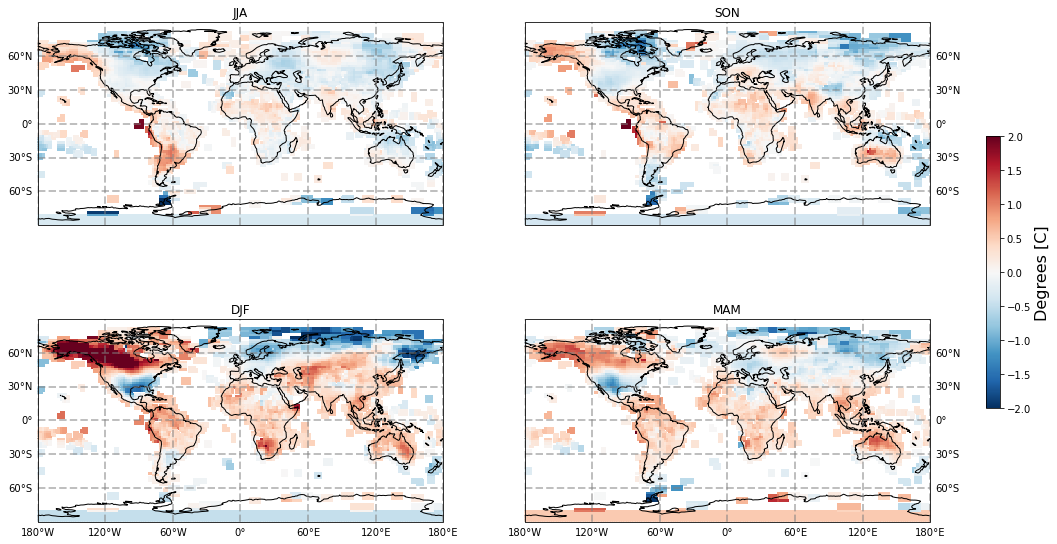

In [11]:
#Plot differenec in seasonal ENSO temperature composites
fig = plt.figure(figsize=(20,10))
axs = []

vmin = -2
vmax = 2

ax = fig.add_subplot(221, projection=ccrs.PlateCarree())
C = temp_comp_diff_jja.plot(ax=ax, vmin=vmin, vmax=vmax, add_colorbar=False, transform=ccrs.PlateCarree(), cmap='RdBu_r')
ax.coastlines()
ax.set_global()
ax.set_title('JJA')
axs.append(ax)
#gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax = fig.add_subplot(222, projection=ccrs.PlateCarree())
C = temp_comp_diff_son.plot(ax=ax, vmin=vmin, vmax=vmax, add_colorbar=False, transform=ccrs.PlateCarree(), cmap='RdBu_r')
ax.coastlines()
ax.set_global()
ax.set_title('SON')
axs.append(ax)
#gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom = False
gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax = fig.add_subplot(223, projection=ccrs.PlateCarree())
C = temp_comp_diff_djf.plot(ax=ax, vmin=vmin, vmax=vmax, add_colorbar=False, transform=ccrs.PlateCarree(), cmap='RdBu_r')
ax.coastlines()
ax.set_global()
ax.set_title('DJF')
axs.append(ax)
#gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax = fig.add_subplot(224, projection=ccrs.PlateCarree())
C = temp_comp_diff_mam.plot(ax=ax, vmin=vmin, vmax=vmax, add_colorbar=False, transform=ccrs.PlateCarree(), cmap='RdBu_r')
ax.coastlines()
ax.set_global()
ax.set_title('MAM')
axs.append(ax)
#gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

cbar = plt.colorbar(C, ax=axs, shrink=0.5, pad=0.05)
cbar.ax.set_ylabel('Degrees [C]', fontsize=16)

#plt.suptitle('Difference in seasonal temperature anomalies (El Nino - La Nina)', x=0.43, fontsize=16)

plt.savefig('seasonal_mean_temp_anoms_el_nino_minus_la_nina.jpg', bbox_inches='tight', dpi=300, quality=80, optimize=True, progressive=True)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.01/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.01/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.01/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:319: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.01/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle 

Text(0.43, 0.98, 'Seasonal precipitation anomalies El Nino')

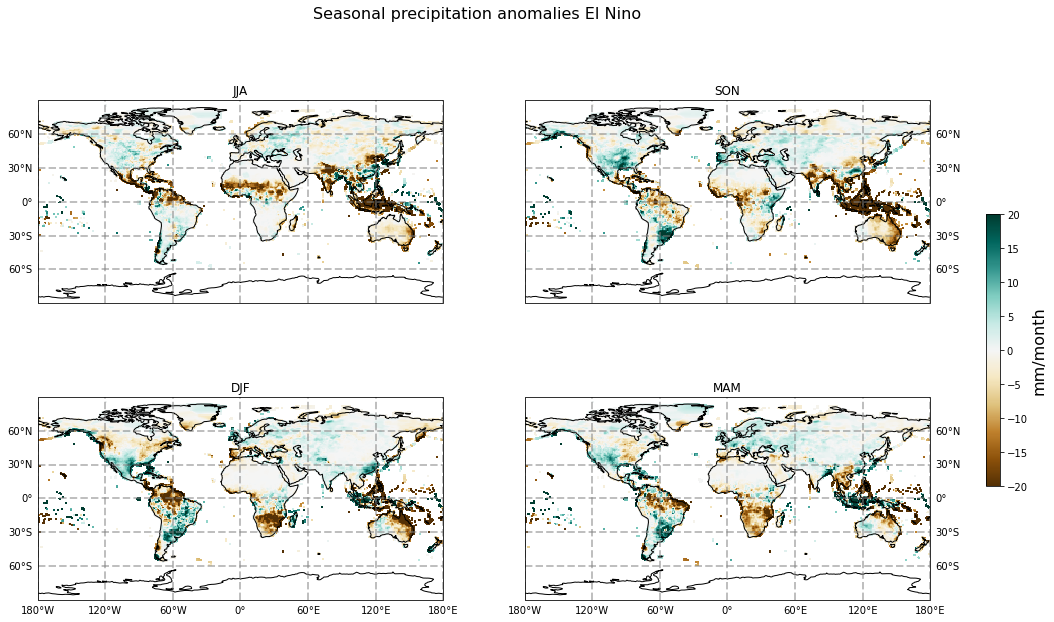

In [12]:
#plot seasonal el nino precipitation composites
fig = plt.figure(figsize=(20,10))
axs = []

vmin = -20 
vmax = 20

ax = fig.add_subplot(221, projection=ccrs.PlateCarree())
C = seasonal_precip_jja_el_nino.mean(dim='time').plot(ax=ax, vmin=vmin, vmax=vmax, add_colorbar=False, transform=ccrs.PlateCarree(), cmap='BrBG')
ax.coastlines()
ax.set_global()
ax.set_title('JJA')
axs.append(ax)
#gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax = fig.add_subplot(222, projection=ccrs.PlateCarree())
C = seasonal_precip_son_el_nino.mean(dim='time').plot(ax=ax, vmin=vmin, vmax=vmax, add_colorbar=False, transform=ccrs.PlateCarree(), cmap='BrBG')
ax.coastlines()
ax.set_global()
ax.set_title('SON')
axs.append(ax)
#gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom = False
gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax = fig.add_subplot(223, projection=ccrs.PlateCarree())
C = seasonal_precip_djf_el_nino.mean(dim='time').plot(ax=ax, vmin=vmin, vmax=vmax, add_colorbar=False, transform=ccrs.PlateCarree(), cmap='BrBG')
ax.coastlines()
ax.set_global()
ax.set_title('DJF')
axs.append(ax)
#gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax = fig.add_subplot(224, projection=ccrs.PlateCarree())
C = seasonal_precip_mam_el_nino.mean(dim='time').plot(ax=ax, vmin=vmin, vmax=vmax, add_colorbar=False, transform=ccrs.PlateCarree(), cmap='BrBG')
ax.coastlines()
ax.set_global()
ax.set_title('MAM')
axs.append(ax)
#gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

cbar = plt.colorbar(C, ax=axs, shrink=0.5, pad=0.05)
cbar.ax.set_ylabel('mm/month', fontsize=16)

plt.suptitle('Seasonal precipitation anomalies El Nino', x=0.43, fontsize=16)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.01/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.01/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.01/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:319: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.01/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle 

Text(0.43, 0.98, 'Seasonal precipitation anomalies La Nina')

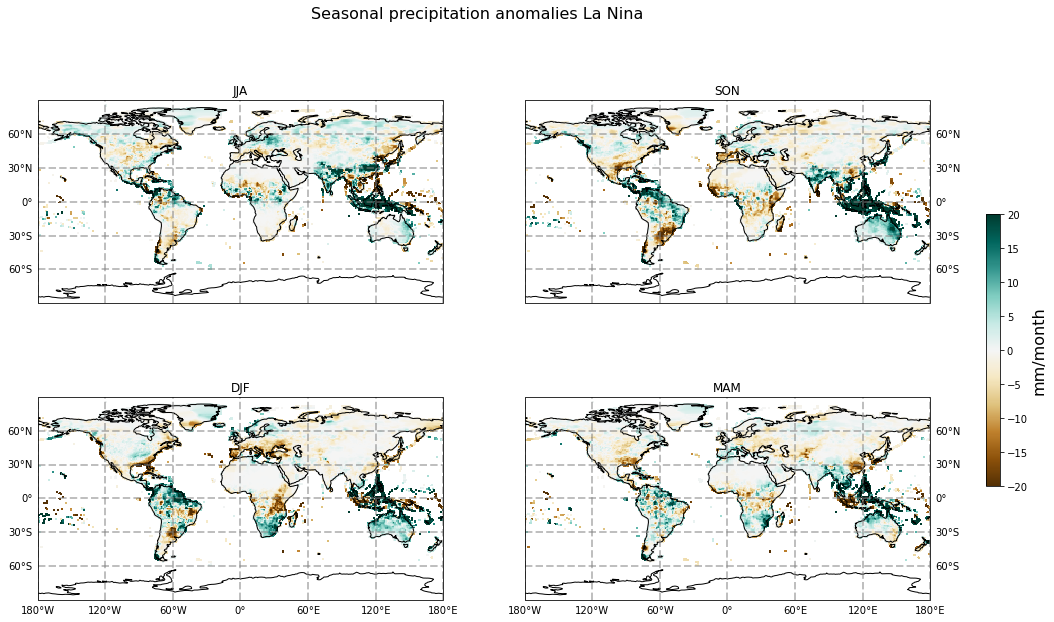

In [13]:
#plot seasonal el nino precipitation composites
fig = plt.figure(figsize=(20,10))
axs = []

vmin = -20
vmax = 20

ax = fig.add_subplot(221, projection=ccrs.PlateCarree())
C = seasonal_precip_jja_la_nina.mean(dim='time').plot(ax=ax, vmin=vmin, vmax=vmax, add_colorbar=False, transform=ccrs.PlateCarree(), cmap='BrBG')
ax.coastlines()
ax.set_global()
ax.set_title('JJA')
axs.append(ax)
#gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax = fig.add_subplot(222, projection=ccrs.PlateCarree())
C = seasonal_precip_son_la_nina.mean(dim='time').plot(ax=ax, vmin=vmin, vmax=vmax, add_colorbar=False, transform=ccrs.PlateCarree(), cmap='BrBG')
ax.coastlines()
ax.set_global()
ax.set_title('SON')
axs.append(ax)
#gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom = False
gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax = fig.add_subplot(223, projection=ccrs.PlateCarree())
C = seasonal_precip_djf_la_nina.mean(dim='time').plot(ax=ax, vmin=vmin, vmax=vmax, add_colorbar=False, transform=ccrs.PlateCarree(), cmap='BrBG')
ax.coastlines()
ax.set_global()
ax.set_title('DJF')
axs.append(ax)
#gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax = fig.add_subplot(224, projection=ccrs.PlateCarree())
C = seasonal_precip_mam_la_nina.mean(dim='time').plot(ax=ax, vmin=vmin, vmax=vmax, add_colorbar=False, transform=ccrs.PlateCarree(), cmap='BrBG')
ax.coastlines()
ax.set_global()
ax.set_title('MAM')
axs.append(ax)
#gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

cbar = plt.colorbar(C, ax=axs, shrink=0.5, pad=0.05)
cbar.ax.set_ylabel('mm/month', fontsize=16)

plt.suptitle('Seasonal precipitation anomalies La Nina', x=0.43, fontsize=16)

In [14]:
#Plot difference in seasonal ENSO precipitation composites
precip_comp_diff_jja = seasonal_precip_jja_el_nino.mean(dim='time') - seasonal_precip_jja_la_nina.mean(dim='time')
precip_comp_diff_son = seasonal_precip_son_el_nino.mean(dim='time') - seasonal_precip_son_la_nina.mean(dim='time')
precip_comp_diff_djf = seasonal_precip_djf_el_nino.mean(dim='time') - seasonal_precip_djf_la_nina.mean(dim='time')
precip_comp_diff_mam = seasonal_precip_mam_el_nino.mean(dim='time') - seasonal_precip_mam_la_nina.mean(dim='time')

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.01/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.01/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.01/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:319: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.01/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle 

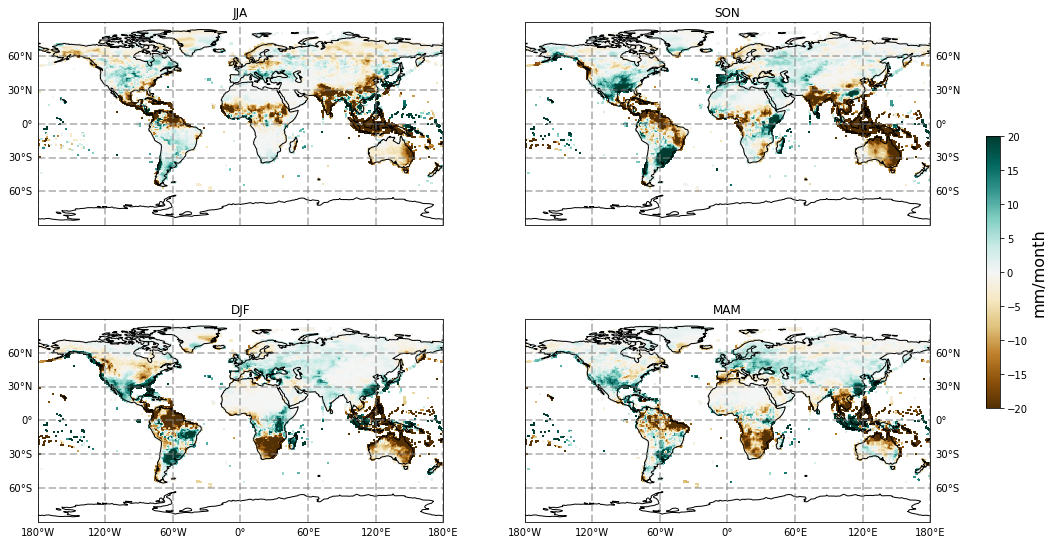

In [15]:
#Plot differenec in seasonal ENSO precipitation composites
fig = plt.figure(figsize=(20,10))
axs = []

vmin = -20
vmax = 20

ax = fig.add_subplot(221, projection=ccrs.PlateCarree())
C = precip_comp_diff_jja.plot(ax=ax, vmin=vmin, vmax=vmax, add_colorbar=False, transform=ccrs.PlateCarree(), cmap='BrBG')
ax.coastlines()
ax.set_global()
ax.set_title('JJA')
axs.append(ax)
#gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax = fig.add_subplot(222, projection=ccrs.PlateCarree())
C = precip_comp_diff_son.plot(ax=ax, vmin=vmin, vmax=vmax, add_colorbar=False, transform=ccrs.PlateCarree(), cmap='BrBG')
ax.coastlines()
ax.set_global()
ax.set_title('SON')
axs.append(ax)
#gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom = False
gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax = fig.add_subplot(223, projection=ccrs.PlateCarree())
C = precip_comp_diff_djf.plot(ax=ax, vmin=vmin, vmax=vmax, add_colorbar=False, transform=ccrs.PlateCarree(), cmap='BrBG')
ax.coastlines()
ax.set_global()
ax.set_title('DJF')
axs.append(ax)
#gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax = fig.add_subplot(224, projection=ccrs.PlateCarree())
C = precip_comp_diff_mam.plot(ax=ax, vmin=vmin, vmax=vmax, add_colorbar=False, transform=ccrs.PlateCarree(), cmap='BrBG')
ax.coastlines()
ax.set_global()
ax.set_title('MAM')
axs.append(ax)
#gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

cbar = plt.colorbar(C, ax=axs, shrink=0.5, pad=0.05)
cbar.ax.set_ylabel('mm/month', fontsize=16)

#plt.suptitle('Difference in seasonal precipitation anomalies (El Nino - La Nina)', x=0.43, fontsize=16)

#plt.savefig('seasonal_mean_precip_anoms_el_nino_minus_la_nina.jpg', bbox_inches='tight', dpi=300, quality=80, optimize=True, progressive=True)

In [16]:
#test pattern correlation using scipy.signal.correlate2d
from scipy import signal
corr_test_same = signal.correlate2d(seasonal_temp_djf_el_nino.mean(dim='time'), seasonal_temp_djf_el_nino.mean(dim='time'))
corr_test_diff = signal.correlate2d(seasonal_temp_djf_el_nino.mean(dim='time'), seasonal_temp_djf_la_nina.mean(dim='time'))
#not coping with nan values, maybe try try except?

In [90]:
# test if same sign at each gridpoint and assign
# 0 if both pos
# 1 if both neg
# 2 if a pos and b neg
# 3 if a neg and b pos
# 4 if nan

for i in np.arange(0,90):
    for j in np.arange(0,180):
        if a.isel(lat=i).isel(lon=j) > 0 and b.isel(lat=i).isel(lon=j) > 0:
            sign_test[i][j]=0
        elif a.isel(lat=i).isel(lon=j) < 0 and b.isel(lat=i).isel(lon=j) < 0:
            sign_test[i][j]=1
        elif a.isel(lat=i).isel(lon=j) > 0 and b.isel(lat=i).isel(lon=j) < 0:
            sign_test[i][j]=2
        elif a.isel(lat=i).isel(lon=j) < 0 and b.isel(lat=i).isel(lon=j) > 0:
            sign_test[i][j]=3
        else: sign_test[i][j]=4

In [16]:
a = seasonal_temp_djf_el_nino.mean(dim='time')
b = seasonal_temp_djf_la_nina.mean(dim='time')

In [29]:
def sign_corr(a,b):
    indicator_array = np.empty(shape=np.shape(a))
    for i in np.arange(0,90):
        for j in np.arange(0,180):
            if a.isel(lat=i).isel(lon=j) > 0 and b.isel(lat=i).isel(lon=j) > 0:
                indicator_array[i][j]=0
            elif a.isel(lat=i).isel(lon=j) < 0 and b.isel(lat=i).isel(lon=j) < 0:
                indicator_array[i][j]=1
            elif a.isel(lat=i).isel(lon=j) > 0 and b.isel(lat=i).isel(lon=j) < 0:
                indicator_array[i][j]=2
            elif a.isel(lat=i).isel(lon=j) < 0 and b.isel(lat=i).isel(lon=j) > 0:
                indicator_array[i][j]=3
            else: indicator_array[i][j]=4
    return indicator_array

In [113]:
func=reload(func)

In [114]:
test = func.sign_corr(a,b)

In [115]:
test

array([[4., 4., 4., ..., 4., 4., 4.],
       [4., 4., 4., ..., 4., 4., 4.],
       [4., 4., 4., ..., 4., 4., 4.],
       ...,
       [3., 3., 3., ..., 3., 3., 3.],
       [3., 3., 3., ..., 3., 3., 3.],
       [3., 3., 3., ..., 3., 3., 3.]])

In [88]:
#Have array now need to assign a color to each number
# 0 mean both positive so make red
# 1 means both negative so make blue
# 2 means a positive and b negative so make purple
# 3 means a negative and b positive so make different shade of purple
# 4 means nan so make grey

In [162]:
#Create colorbar
import matplotlib as mpl
color_array = ['red', 'blue', 'darkviolet', 'mediumpurple', 'lightgrey']
cmap = mpl.colors.ListedColormap(color_array)
bounds=np.arange(-1,5)
norm=mpl.colors.BoundaryNorm(bounds+0.5, cmap_sign.N)

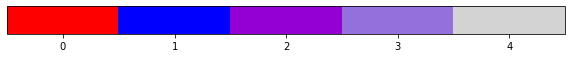

In [166]:
fig, ax = plt.subplots(figsize=(10, 1))
fig.subplots_adjust(bottom=0.5)
cb = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                boundaries=bounds+0.5,
                                ticks=bounds,
                                spacing='proportional',
                                orientation='horizontal')

In [93]:
test2 = xr.DataArray(test)

In [97]:
lons = a.lon.values
lats = a.lat.values

[Text(1, 0.0, 'Pos'),
 Text(1, 1.0, 'Neg'),
 Text(1, 2.0, 'Pos/Neg'),
 Text(1, 3.0, 'Neg/Pos'),
 Text(1, 4.0, 'NaN')]

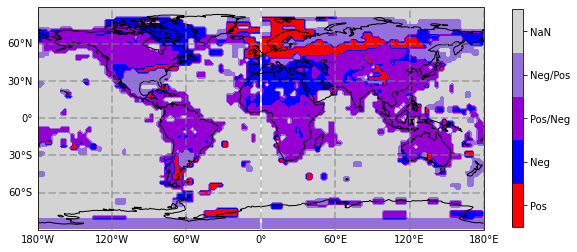

In [229]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
ptype = plt.contourf(lons, lats, test2, cmap=cmap, norm=norm, levels=bounds+0.5, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()
#gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
#colorbar
cbar = plt.colorbar(ticks=bounds, shrink=0.8)
cbar.ax.set_yticklabels(['Pos', 'Neg', 'Pos/Neg', 'Neg/Pos', 'NaN'])

In [197]:
zero_test = np.ones_like(a) 

In [198]:
zero_test

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

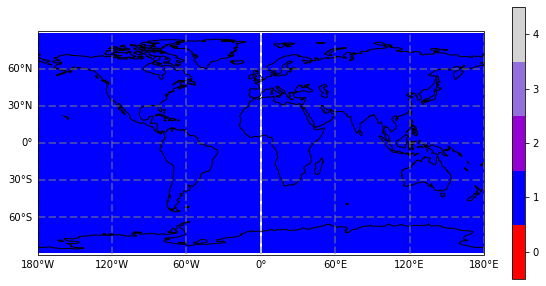

In [222]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
ptype = plt.contourf(lons, lats, zero_test, cmap=cmap, norm=norm, levels=bounds+0.5, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()
#gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
plt.colorbar(ticks=bounds)